<a href="https://www.kaggle.com/code/alamukiiraakha/spaceship-titanic-using-eda-and-decision-tree?scriptVersionId=142654637" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [6]:
train.shape

(8693, 14)

In [7]:
test.shape

(4277, 13)

In [8]:
submission.shape

(4277, 2)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
train.duplicated().any()

False

In [12]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [13]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [14]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

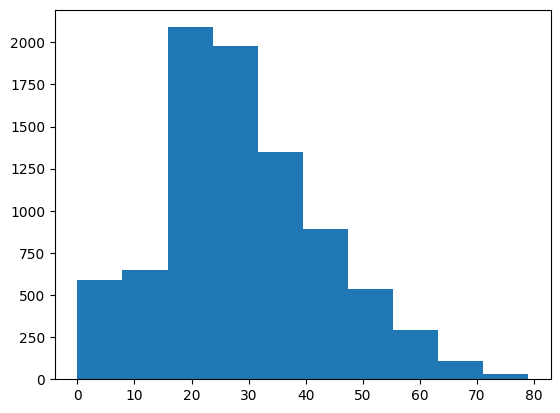

In [15]:
plt.hist(train['Age'])
plt.show()

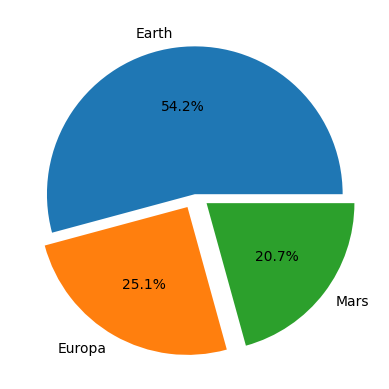

In [16]:
sizes=[train.HomePlanet.value_counts()[0] ,train.HomePlanet.value_counts()[1] , train.HomePlanet.value_counts()[2]]
labels = ['Earth', 'Europa', 'Mars']

plt.pie(sizes,labels=labels, autopct='%1.1f%%', explode = (0, 0.1,0.1))
plt.show()

In [17]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

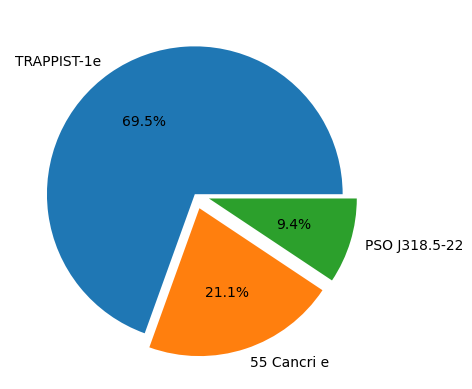

In [18]:
sizes=[train.Destination.value_counts()[0] ,train.Destination.value_counts()[1] , train.Destination.value_counts()[2]]
labels = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
plt.pie(sizes,labels=labels, autopct='%1.1f%%', explode = (0, 0.1,0.1))
plt.show()

In [19]:
train['Transported'].replace(False,'No',inplace=True)
train['Transported'].replace(True,'Yes',inplace=True)

train['CryoSleep'].replace(False,'No',inplace=True)
train['CryoSleep'].replace(True,'Yes',inplace=True)

train['VIP'].replace(False,'No',inplace=True)
train['VIP'].replace(True,'Yes',inplace=True)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,No,B/0/P,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,No
1,0002_01,Earth,No,F/0/S,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,Juanna Vines,Yes
2,0003_01,Europa,No,A/0/S,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,No
3,0003_02,Europa,No,A/0/S,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,No
4,0004_01,Earth,No,F/1/S,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,Willy Santantines,Yes


Transported
Yes    4378
No     4315
Name: count, dtype: int64


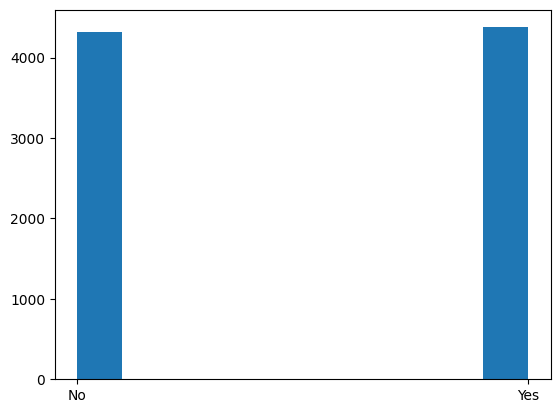

In [20]:
plt.hist(train['Transported'])
print(train['Transported'].value_counts())
plt.show()

In [21]:
print(train['VIP'].value_counts())


VIP
No     8291
Yes     199
Name: count, dtype: int64


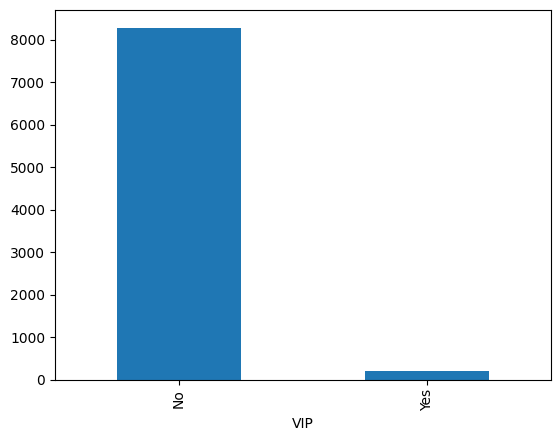

In [22]:
train.VIP.value_counts().plot.bar();

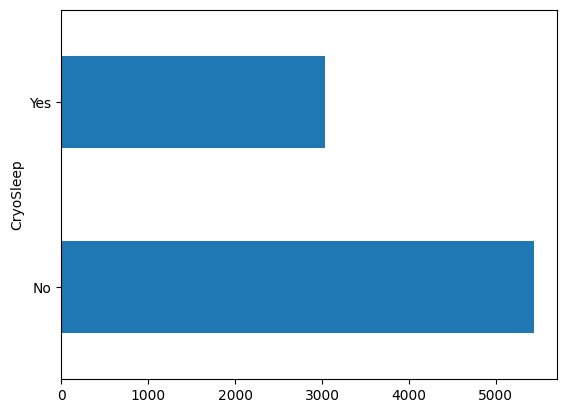

In [23]:
train.CryoSleep.value_counts().plot.barh();

In [24]:
print(train['CryoSleep'].value_counts())

CryoSleep
No     5439
Yes    3037
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


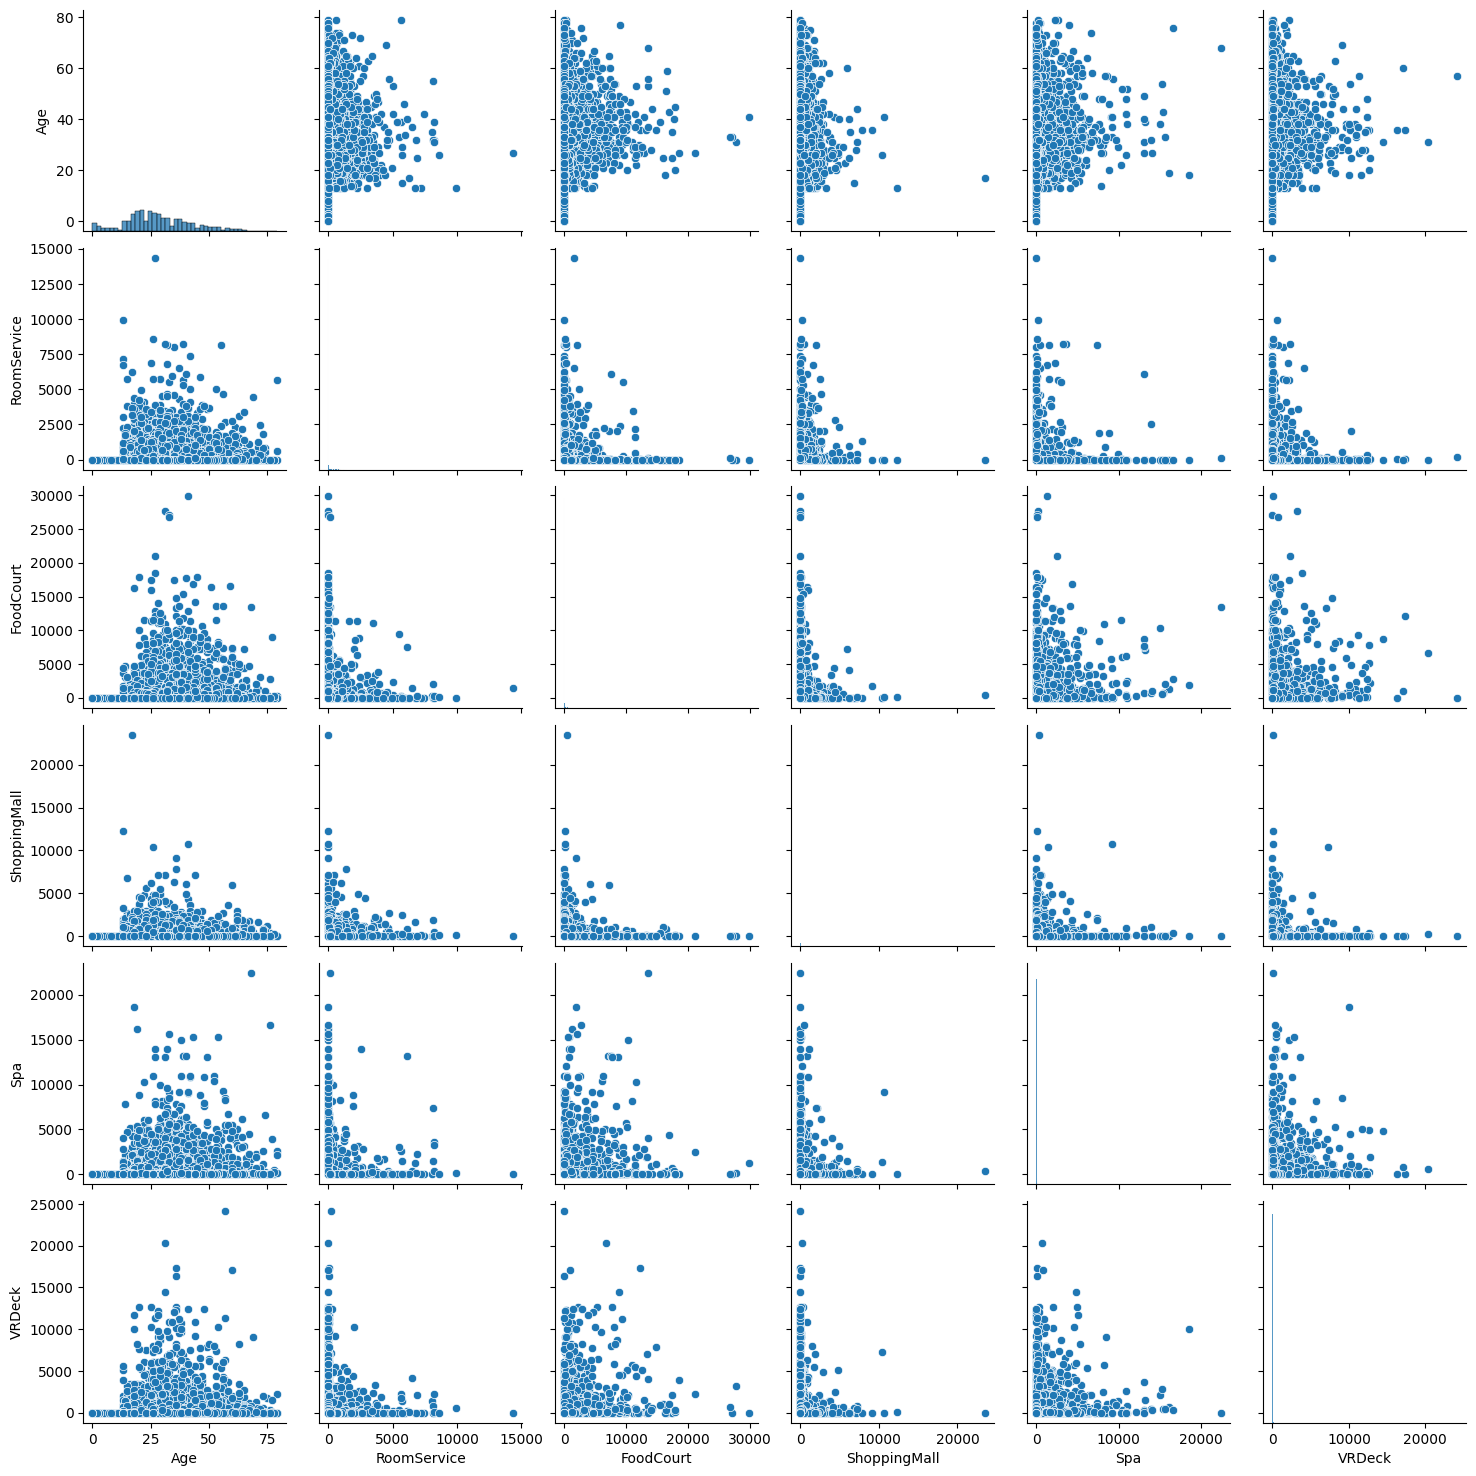

In [25]:
import seaborn as sns
sns.pairplot(train)
plt.show()

In [26]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
train['HomePlanet']=le.fit_transform(train['HomePlanet'])
train['CryoSleep']=le.fit_transform(train['CryoSleep'])
train['VIP']=le.fit_transform(train['VIP'])
train['Transported']=le.fit_transform(train['Transported'])

In [27]:
train['Destination']=le.fit_transform(train['Destination'])

train['Cabin']=le.fit_transform(train['Cabin'])

In [28]:
x = train.drop(columns=['PassengerId','Transported','Name'],axis = 1).fillna(0)
y = train['Transported']
test = test.drop(columns=['PassengerId'], axis=1).fillna(0)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=1)

In [31]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_train,y_train)


0.9996565934065934

In [32]:
pred= model.predict(x_test)

In [33]:
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix

In [34]:
print('Accuracy:', model.score(x_train,y_train))
print('Precision:',precision_score(y_test,pred))
print('Recall:', recall_score(y_test,pred))
print('F1 score:', f1_score(y_test,pred))

Accuracy: 0.9996565934065934
Precision: 0.7267165193745752
Recall: 0.7392807745504841
F1 score: 0.7329448063078506


In [35]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

In [36]:
feature_names = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
dot_file = export_graphviz(model,feature_names = feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png',cleanup='True')
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.582204 to fit


In [37]:
print(confusion_matrix(y_test, pred))
confusion = confusion_matrix(y_test, pred)

[[1021  402]
 [ 377 1069]]


In [38]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [39]:

test['CryoSleep'].replace(False,'No',inplace=True)
test['CryoSleep'].replace(True,'Yes',inplace=True)

test['VIP'].replace(False,'No',inplace=True)
test['VIP'].replace(True,'Yes',inplace=True)

In [40]:

test['VIP']=le.fit_transform(test['VIP'])
test['CryoSleep']= le.fit_transform(test['CryoSleep'])



In [41]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [42]:
test['Cabin'] = test['Cabin'].astype('category')
test['Cabin'] = test['Cabin'].cat.codes

In [43]:
test['Destination'] = test['Destination'].astype('category')
test['Destination'] = test['Destination'].cat.codes

In [44]:
from sklearn.preprocessing import OneHotEncoder
test['HomePlanet'] = test['HomePlanet'].astype('category')
test['HomePlanet'] = test['HomePlanet'].cat.codes
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(
    test[['HomePlanet', 'Cabin','Destination']]).toarray())
nem = test.join(enc_data)
nem

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,3264,3265,3266,3267,3268,3269,3270,3271,3272,3273
0,1,1,2785,3,27.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,1868,3,19.0,0,0.0,9.0,0.0,2823.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,258,1,31.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,0,260,3,38.0,0,0.0,6652.0,0.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,1941,3,20.0,0,10.0,0.0,635.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,1,2680,3,34.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4273,1,0,0,3,42.0,0,0.0,847.0,17.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4274,3,1,603,1,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4275,2,0,604,0,0.0,0,0.0,2680.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,1,2785,3,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,1,0,1868,3,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,2,1,258,1,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,2,0,260,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,1,0,1941,3,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [46]:

test = test.drop(columns=['Name'],axis = 1).fillna(0) 
prediction = model.predict(test)

In [47]:
prediction = model.predict(test)
pred = pd.DataFrame(prediction)
pred


,0
0,1
1,0
2,0
3,1
4,1
...,...
4272,1
4273,1
4274,1
4275,1


In [48]:
pred = pred.astype('bool')
pred

,0
0,True
1,False
2,False
3,True
4,True
...,...
4272,True
4273,True
4274,True
4275,True


In [49]:
submission = pd.DataFrame({'PassengerId': submission.PassengerId, 'Transported': pred[0]})

submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,False
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
